<a href="https://www.kaggle.com/code/mahsan/pakistan-toshakhana-descriptive-data-analysis?scriptVersionId=122395921" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
file_path = '/kaggle/input/pakistan-toshakhana-files/Refined_TK_data ver 2.csv'

/kaggle/input/pakistan-toshakhana-files/Refined_TK_data ver 2.csv
/kaggle/input/pakistan-toshakhana-files/Toshakhana Files 2.xlsx


# Data Sample

In [2]:
df = pd.read_csv(file_path)
df.tail()

,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks
4209,One Model of Door of\nKhana Kaaba,NaN,"Mian Muhammad Shehbaz Sharif,\nPrime Minist...",PMLN,10/18/2022,35000.0,0.0,Displayed\nat Prime\nMinister\nHouse,Displayed\nat Prime\nMinister\nHouse
4210,One Calligraphy duly\nframed,NaN,"SP Mahzoor Ali Ghauri, Chief\nSecurity Off...",NaN,10/20/2022,42000.0,6000.0,Yes,Yes
4211,a. Torsyk Set with\nsilver Tray\nb. Book\nc. ...,NaN,"Mian Muhammad Shehbaz Sharif,\nPrime Minist...",PMLN,10/20/2022,85000.0,0.0,S.No.(a)\ndisplayed at\nPrime\nMinister\nHouse...,S.No.(a)\ndisplayed at\nPrime\nMinister\nHouse...
4212,One Carved wood\npanel,NaN,"Mian Muhammad Shehbaz Sharif,\nPrime Minist...",PMLN,10/20/2022,50000.0,0.0,No,No
4213,a. One Mont Blanc\nBrief Case\nb. One Mont ...,Pen,"Mr. Bilawal Bhutto Zardari,\nMinister for F...",PPP,10/24/2022,434000.0,0.0,No,No


# Data Cleaning and Transformation

In [3]:
df['Detail of Gifts'] = df['Detail of Gifts'].str.replace('\n',' ')
df['Name of Recipient'] = df['Name of Recipient'].str.replace('\n',' ')

# Fixing spelling mistakes
df['Name of Recipient'] = df['Name of Recipient'].str.replace('Parvez','Pervez')
df['Name of Recipient'] = df['Name of Recipient'].str.replace('Parvaiz','Pervez')
df['Name of Recipient'] = df['Name of Recipient'].str.replace('Pervaiz','Pervez')
df['Name of Recipient'] = df['Name of Recipient'].str.replace('Musharaf','Musharraf')
df['Name of Recipient'] = df['Name of Recipient'].str.replace('Muhammad Ishaq','Ishaq')
# Splitting column
df[['Recipient Name', 'Office']] = df['Name of Recipient'].str.split(',', 1, expand=True)
df['Retained'] = df['Retained'].str.replace('\n',' ')
df['Remarks'] = df['Remarks'].str.replace('\n',' ')

df.tail()

,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks,Recipient Name,Office
4209,One Model of Door of Khana Kaaba,NaN,"Mian Muhammad Shehbaz Sharif, Prime Ministe...",PMLN,10/18/2022,35000.0,0.0,Displayed at Prime Minister House,Displayed at Prime Minister House,Mian Muhammad Shehbaz Sharif,Prime Minister of Pakistan
4210,One Calligraphy duly framed,NaN,"SP Mahzoor Ali Ghauri, Chief Security Offi...",NaN,10/20/2022,42000.0,6000.0,Yes,Yes,SP Mahzoor Ali Ghauri,Chief Security Officer to the Prime Mini...
4211,a. Torsyk Set with silver Tray b. Book c. Boo...,NaN,"Mian Muhammad Shehbaz Sharif, Prime Ministe...",PMLN,10/20/2022,85000.0,0.0,S.No.(a) displayed at Prime Minister House S.N...,S.No.(a) displayed at Prime Minister House S.N...,Mian Muhammad Shehbaz Sharif,Prime Minister of Pakistan
4212,One Carved wood panel,NaN,"Mian Muhammad Shehbaz Sharif, Prime Ministe...",PMLN,10/20/2022,50000.0,0.0,No,No,Mian Muhammad Shehbaz Sharif,Prime Minister of Pakistan
4213,a. One Mont Blanc Brief Case b. One Mont B...,Pen,"Mr. Bilawal Bhutto Zardari, Minister for Fo...",PPP,10/24/2022,434000.0,0.0,No,No,Mr. Bilawal Bhutto Zardari,Minister for Foreign Affairs


# Most Famous Gift Categories

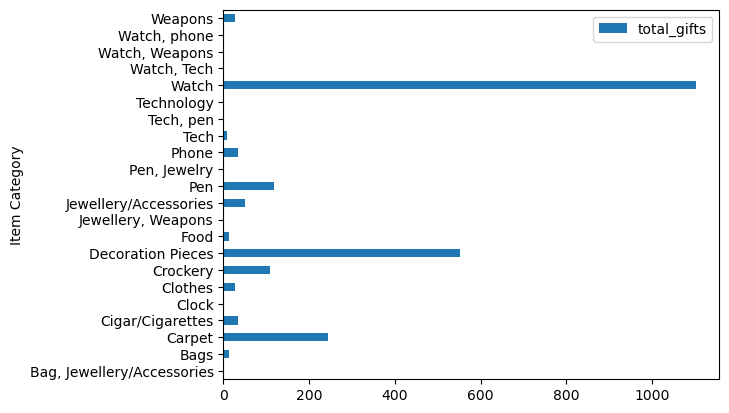

In [4]:
import pandas as pd

result = pd.DataFrame(df.groupby("Item Category").agg(total_gifts=('Item Category', 'count')))
plot = result.plot.barh()

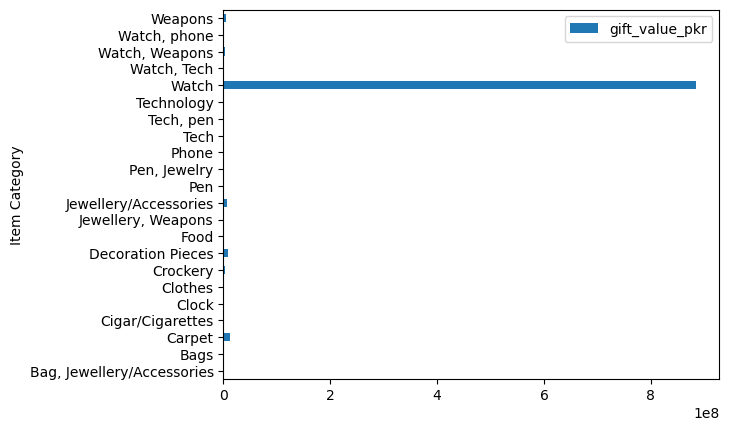

In [5]:
result = pd.DataFrame(df.groupby("Item Category").agg(gift_value_pkr=('Assessed Value', 'sum')))
plot = result.plot.barh()

# Top Gift Receivers (Departments)

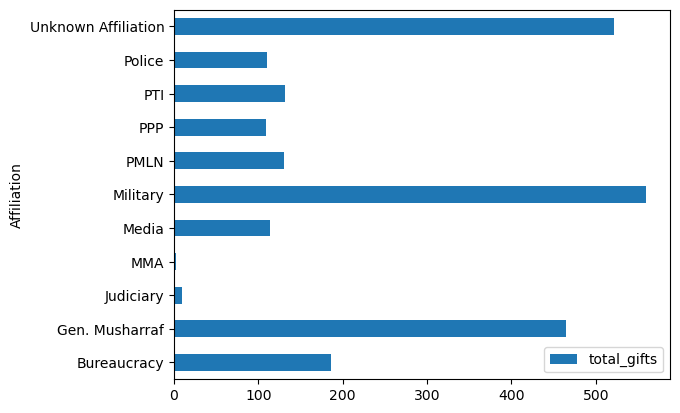

In [6]:
df["Affiliation"] = df["Affiliation"].str.replace('Gen Mus','Gen. Musharraf', regex=True)
df["Affiliation"] = df["Affiliation"].str.replace('Gen. Musharrafarraf','Gen. Musharraf', regex=True)
df["Affiliation"] = df["Affiliation"].fillna('Unknown Affiliation')
result = pd.DataFrame(df.groupby("Affiliation").agg(total_gifts=('Item Category', 'count')))
plot = result.plot.barh()

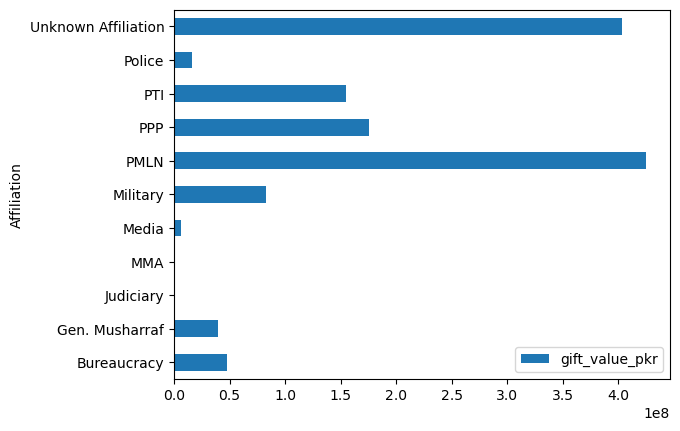

In [7]:
result = pd.DataFrame(df.groupby("Affiliation").agg(gift_value_pkr=('Assessed Value', 'sum')))
plot = result.plot.barh()

# Top Gift Retainers (Departments)

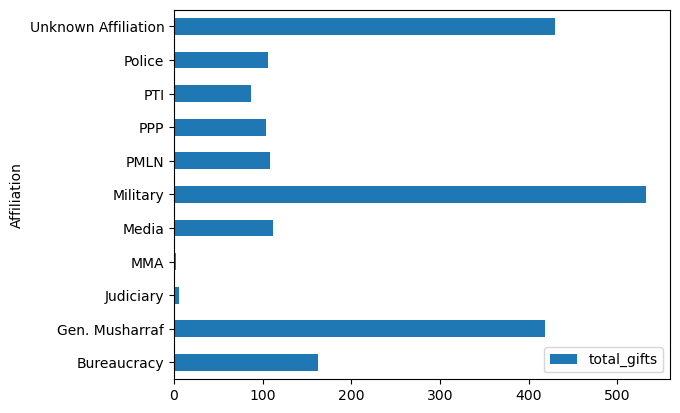

In [8]:
retained_df = df[df['Retained']=="Yes"]
result = pd.DataFrame(retained_df.groupby("Affiliation").agg(total_gifts=('Item Category', 'count')))
plot = result.plot.barh()

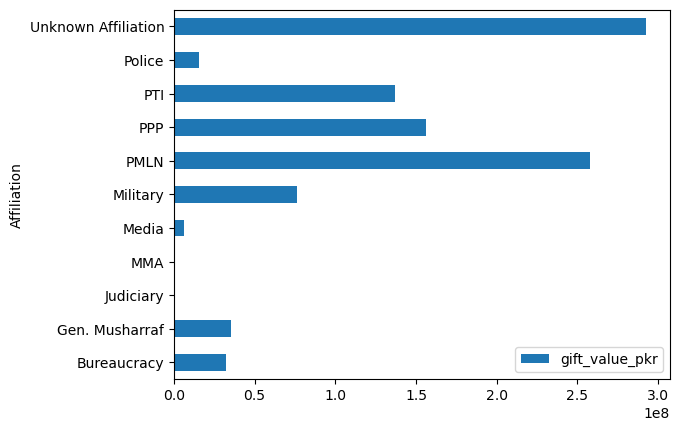

In [9]:
result = pd.DataFrame(retained_df.groupby("Affiliation").agg(gift_value_pkr=('Assessed Value', 'sum')))
plot = result.plot.barh()

# Top Gift Retainers (Individuals with Spouses)

In [10]:
name_df= pd.DataFrame(retained_df[["Name of Recipient",'Item Category', 'Assessed Value' ]].copy())

# Clean Up Names + Merging Spouses

name_df['Name of Recipient'] = name_df['Name of Recipient'].str.replace(',',' ') \
.str.replace('.',' ') \
.str.replace('Sameena','') \
.str.replace('Secretary','') \
.str.replace('Ms ',' ') \
.str.strip(' ') \
.str.replace('Mr. ','') \
.str.replace('the ','') \
.str.replace(' of ','') \
.str.replace(' to ','') \
.str.replace('Minster','') \
.str.replace(' Lady ','') \
.str.replace(' lady ','') \
.str.replace('First','') \
.str.replace(' son ','') \
.str.replace(' wife ','') \
.str.replace('Wife ','') \
.str.replace(' Wife','') \
.str.replace('Gen ','') \
.str.replace('Foreign','') \
.str.replace('of Pakistan','') \
.str.replace('Pakistan','') \
.str.replace('President','') \
.str.replace('Prime','') \
.str.replace('Minister','') \
.str.replace('Senator','') \
.str.replace('First Lady','') \
.str.replace('Begum ','') \
.str.replace('Finance','') \
.str.replace('General ','') \
.str.strip(' ') \
.str.replace('First Lady of','') \
.str.replace(' ','_') \
.str.replace('____','_') \
.str.replace('___','_') \
.str.replace('__','_') \
.str.replace('Shahid_Shahid','Shahid') # Wife of Khaqan Abbasi (Sameena Shahid)

result = pd.DataFrame(name_df.groupby("Name of Recipient").agg(total_gifts=('Item Category', 'count'), gift_value_pkr=('Assessed Value', 'sum')))
result.sort_values(['gift_value_pkr', 'total_gifts'],ascending = [False, False]).head(15)

,total_gifts,gift_value_pkr
Name of Recipient,,
Shahid_Khaqan_Abbasi,11,173803500.0
Asif_Ali_Zardari,50,145071309.0
Muhammad_Nawaz_Sharif,22,134863898.0
Imran_Khan,35,116163600.0
Khawaja_Muhammad_Asif,2,56218788.0
Pervez_Musharraf,39,32673803.0
Abdullah_Khaqan_Abbasi,3,26931000.0
Shaukat_Aziz,217,25439094.0
Mamnoon_Hussain,47,22101131.0
